# Evaluating Performance Of The Model And Saving The Model

The dataset is already download in .csv format

# IMPORTING THE PACKAGE

In [81]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [82]:
df=pd.read_csv("D:\loan_prediction.csv")

In [80]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

# Handle the Missing values

In [5]:
#checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Treating the Null Value

We will fill the missing values in numeric data type using the mean value of that particular column and categorical data type using the most repeated value

In [6]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [7]:
numerical_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [8]:
categorical_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
#replace + with non value 
df['Dependents'] = df['Dependents'].str.replace('+','')
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [10]:
#checking the null values now
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now the null value is retreated

# Handling Categorical Values

In [11]:
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [14]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df['Married'].replace({'Yes':1,'No':0},inplace=True)

In [16]:
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [17]:
df['Dependents'].replace({'0':0,'1':1,'2':2,'3':3},inplace=True)

In [18]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

In [20]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [21]:
df['Property_Area'].replace({'Urban':2,'Rural':0,'Semiurban':1},inplace=True)

In [22]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [23]:
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [24]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [25]:
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)

In [26]:
df['CoapplicantIncome']=df['CoapplicantIncome'].astype("int64")
df['LoanAmount']=df['LoanAmount'].astype("int64")
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype("int64")
df['Credit_History']=df['Credit_History'].astype("int64")

In [27]:
# dummy columns are created for the categories in Loan_ID
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_ID'] = le.fit_transform(df.Loan_ID)

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,2,1,1,0,1,1,3000,0,66,360,1,2,1
3,3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,4,1,0,0,1,0,6000,0,141,360,1,2,1


# Balancing The Dataset

In [29]:
from imblearn.combine import SMOTETomek

In [30]:
smote = SMOTETomek(0.90)

In [31]:
#dividing the dataset into dependent and independent y and x respectively

y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'],axis=1)

In [32]:
#creating the new x and y for balance data
x_bal,y_bal = smote.fit_resample(x,y)

In [33]:
#printing the value before and after balancing 
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    365
0    322
Name: Loan_Status, dtype: int64


# Scaling The Data

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)

In [36]:
x_bal = pd.DataFrame(x_bal)

In [37]:
x_bal.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.771281,0.553248,-1.166544,-0.698618,0.618299,-0.342160,0.102897,-0.504310,-0.289912,0.28245,0.604818,1.364965
1,-1.765503,0.553248,0.857233,0.347026,0.618299,-0.342160,-0.116536,-0.006260,-0.190761,0.28245,0.604818,-1.179759
2,-1.759725,0.553248,0.857233,-0.698618,0.618299,2.922613,-0.390914,-0.504310,-0.959182,0.28245,0.604818,1.364965
3,-1.753946,0.553248,0.857233,-0.698618,-1.617340,-0.342160,-0.463192,0.274472,-0.289912,0.28245,0.604818,1.364965
4,-1.748168,0.553248,-1.166544,-0.698618,0.618299,-0.342160,0.129069,-0.504310,-0.029641,0.28245,0.604818,1.364965


We will perform scaling only on the input values

# Splitting Data Into Train And Test

In [38]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.33, random_state = 42)

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(460, 12)
(460,)
(227, 12)
(227,)


# COMPARE THE MODEL

# Decision Tree Model

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [42]:
def decisionTreeClassifier(x_train, x_test, y_train, y_test):
    dt = DecisionTreeClassifier() 
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print("****DecisionTreeClassifier****") 
    print("Confusion matrix")
    print(confusion_matrix(y_test ,yPred) ) 
    print("Classification report")
    print(classification_report (y_test, yPred))
    y_pred=dt.predict(x_test)
    y_pred1=dt.predict(x_train)
    print('Testing accuracy: ',accuracy_score(y_test,y_pred))
    print('Training accuracy: ',accuracy_score(y_train,y_pred1))

In [43]:
decisionTreeClassifier(x_train, x_test, y_train, y_test)

****DecisionTreeClassifier****
Confusion matrix
[[ 83  24]
 [ 18 102]]
Classification report
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       107
           1       0.81      0.85      0.83       120

    accuracy                           0.81       227
   macro avg       0.82      0.81      0.81       227
weighted avg       0.82      0.81      0.81       227

Testing accuracy:  0.8149779735682819
Training accuracy:  1.0


DecisionTreeClassifier is giving the accuracy of 100% with training data , 70% accuracy for the testing data.

# Random Forest Model

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [45]:
def randomForestClassifier(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier() 
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print("****RandomForestClassifier****") 
    print("Confusion matrix")
    print(confusion_matrix(y_test ,yPred) ) 
    print("Classification report")
    print(classification_report (y_test, yPred))
    y_pred=rf.predict(x_test)
    y_pred1=rf.predict(x_train)
    print('Testing accuracy: ',accuracy_score(y_test,y_pred))
    print('Training accuracy: ',accuracy_score(y_train,y_pred1))

In [46]:
randomForestClassifier(x_train, x_test, y_train, y_test)

****RandomForestClassifier****
Confusion matrix
[[ 81  26]
 [  9 111]]
Classification report
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       107
           1       0.81      0.93      0.86       120

    accuracy                           0.85       227
   macro avg       0.86      0.84      0.84       227
weighted avg       0.85      0.85      0.84       227

Testing accuracy:  0.8458149779735683
Training accuracy:  1.0


RandomForestClassifier is giving the accuracy of 100% with training data , 80% accuracy for the testing data.

# KNN Model

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [48]:
def kneighborsClassifier(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier() 
    knn.fit(x_train,y_train)
    yPred = knn.predict(x_test)
    print("****KNeighborsClassifier****") 
    print("Confusion matrix")
    print(confusion_matrix(y_test ,yPred) ) 
    print("Classification report")
    print(classification_report (y_test, yPred))
    y_pred=knn.predict(x_test)
    y_pred1=knn.predict(x_train)
    print('Testing accuracy: ',accuracy_score(y_test,y_pred))
    print('Training accuracy: ',accuracy_score(y_train,y_pred1))

In [49]:
kneighborsClassifier(x_train, x_test, y_train, y_test)

****KNeighborsClassifier****
Confusion matrix
[[ 69  38]
 [ 15 105]]
Classification report
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       107
           1       0.73      0.88      0.80       120

    accuracy                           0.77       227
   macro avg       0.78      0.76      0.76       227
weighted avg       0.78      0.77      0.76       227

Testing accuracy:  0.7665198237885462
Training accuracy:  0.8326086956521739


KNeighbors Classifier is giving the accuracy of 85% with training data , 75% accuracy for the testing data.

# Xgboost Model

In [63]:
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [64]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier() 
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print("****Gradient BoostingClassifier****") 
    print("Confusion matrix")
    print(confusion_matrix(y_test ,yPred) ) 
    print("Classification report")
    print(classification_report (y_test, yPred))
    y_pred=xg.predict(x_test)
    y_pred1=xg.predict(x_train)
    print('Testing accuracy: ',accuracy_score(y_test,y_pred))
    print('Training accuracy: ',accuracy_score(y_train,y_pred1))

In [65]:
xgboost(x_train, x_test, y_train, y_test)

****Gradient BoostingClassifier****
Confusion matrix
[[ 74  33]
 [  8 112]]
Classification report
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       107
           1       0.77      0.93      0.85       120

    accuracy                           0.82       227
   macro avg       0.84      0.81      0.81       227
weighted avg       0.83      0.82      0.82       227

Testing accuracy:  0.8193832599118943
Training accuracy:  0.9304347826086956


From the four model Xgboost is performing well. Xgboost is giving the accuracy of 94% with training data , 81% accuracy for the testing data.so we considering xgboost and deploying this model.

# Evaluating Performance Of The Model And Saving The Model

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
# Xgboost Model is selected
xg = GradientBoostingClassifier()

In [68]:
xg.fit(x_train,y_train)

GradientBoostingClassifier()

In [69]:
yPred = xg.predict(x_test)

In [70]:
f1_score(yPred,y_test, average='weighted')

0.8228091539536972

In [71]:
cv = cross_val_score(xg,x,y,cv=5)

In [72]:
np.mean(cv)

0.723110755697721

In [73]:
import pickle
#saviung the model by using pickle function
pickle.dump(xg, open('model.pkl','wb'))

In [74]:
loaded_xg = pickle.load(open('model.pkl','rb'))
loaded_xg.predict(x_test)

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1], dtype=int64)

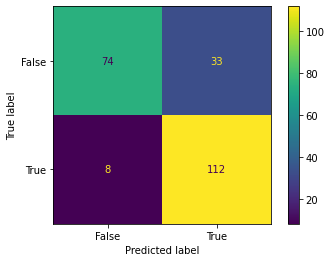

In [75]:
confusion_matrix = metrics.confusion_matrix(y_test, yPred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


In [76]:
xg.summary

AttributeError: 'GradientBoostingClassifier' object has no attribute 'summary'

In [85]:
df = pd.read_csv("D:\loan_prediction.csv")
y = df['Loan_Status']
X = df.drop(columns=['Loan_Status'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf_tree = DecisionTreeClassifier();
clf_reg = LogisticRegression();
clf_tree.fit(X_train, y_train); 
clf_reg.fit(X_train, y_train); 
y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_reg.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

ValueError: could not convert string to float: 'LP002755'